# Script computes stream function in xz-plain

In [247]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import get_coastline_amoc as coasti
from imp import reload
import write_netCDF as write
import amoc_plots as aplot
import tools
import xz_tools as xz_tools
import numpy.ma as ma

## Change to the directory you are working in

In [248]:
cd /work/mh0256/m300522/data_storm/eddies/60-90/xz_11N-18N

/mnt/lustre01/work/mh0256/m300522/data_storm/eddies/60-90/xz_11N-18N


## Load data and grid needed for streamfunction 

In [249]:
uko = tools.netread_data('uko_stripe.nc','uko') # uko
wo_p = tools.netread_data('wo_p_stripe.nc','wo') # wo at p-point
vke = tools.netread_data('vke_stripe.nc','vke') # vke
urho = tools.netread_data('u+rho+_stripe.nc','urho_eddy') # urho_eddy
wrho = tools.netread_data('w+rho+_stripe.nc','wrho_eddy') # wrho_eddy
rho = tools.netread_data('rhopoto_stripe.nc','rhopoto') # density
lat,lon,depth = tools.netread_grid('rhopoto_stripe.nc','lat','lon','depth_2')

## Choose the depth levels that you are interested in and get indices

In [250]:
ztop 	= 800.
zbot	= 4000.

tmp1 = min(depth[:], key=lambda x:abs(x-ztop))
tmp = np.where(np.around(depth[:],decimals=1)==tmp1)[0]
ktop = tmp[0]
tmp1 = min(depth[:], key=lambda x:abs(x-zbot))
tmp = np.where(np.around(depth[:],decimals=1)==tmp1)[0]
kbot = tmp[0]
tmp1 = min(depth[:], key=lambda x:abs(x-2000.))
tmp = np.where(np.around(depth[:],decimals=1)==tmp1)[0]
k2k = tmp[0]

## Find maximum of DWBC in 2000 m (at k2k) for each meridional slice

In [251]:
maxpos = np.zeros((vke.shape[1]))
for j in range(vke.shape[1]):
		tmp1 = vke[k2k,j,:].min()
		tmp2 = np.where(vke[k2k,j,:]==tmp1)[0]
		maxpos[j] = tmp2[0]

## Compute meridional mean

In [252]:
lx=200 # for average
rx=400 # for average
llon=210 # for plot
rlon=240 # for plot

mean_rho, data_rho = xz_tools.meri_average(vke,maxpos,rho,ktop,kbot,lx,rx,llon,rlon)
mean_vke, data_vke = xz_tools.meri_average(vke,maxpos,vke,ktop,kbot,lx,rx,llon,rlon)
mean_uko, data_uko = xz_tools.meri_average(vke,maxpos,uko,ktop,kbot,lx,rx,llon,rlon)
mean_wo_p, data_wo_p = xz_tools.meri_average(vke,maxpos,wo_p,ktop,kbot,lx,rx,llon,rlon)
mean_wrho, data_wrho = xz_tools.meri_average(vke,maxpos,wrho,ktop,kbot,lx,rx,llon,rlon)

/home/mpim/m300522/mod_data/xz_tools.py:25: RuntimeWarning: invalid value encountered in double_scalars
  sum2[k,i] = sum1[k,i] / np.float64(count)


## Construct grid

In [253]:
x,z = np.meshgrid(lon[0,llon:rlon],depth[ktop:kbot])

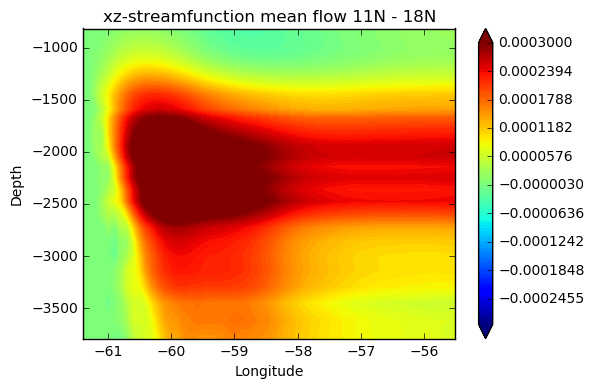

In [254]:
## Now compute the integral over uko to get the streamfunction in the xz-plain

llon=210 # for plot
rlon=270 # for plot
x,z = np.meshgrid(lon[0,llon:rlon],depth[ktop:kbot])
tmp_wo_p = mean_wo_p[ktop:kbot,llon:rlon]
tmp_wo_p = ma.masked_invalid(tmp_wo_p,copy=False)
sum_wo_p = np.zeros((tmp_wo_p.shape))
for i in range(tmp_wo_p.shape[1]):
    sum_wo_p[:,i] = sum_wo_p[:,i-1] + tmp_wo_p[:,i]
sum_wo_p = ma.masked_invalid(sum_wo_p,copy=False)

low = -0.0003
high=0.0003
v = np.linspace(low,high,100)
plt.contourf(x,-z,sum_wo_p,v,extend="both")
plt.set_cmap("jet")
plt.colorbar()
plt.title("xz-streamfunction mean flow 11N - 18N")
plt.xlabel("Longitude")
plt.ylabel("Depth")
plt.savefig("xz-streamfunction_mf_11N-18N.png")
plt.show()

## Get vertical derivative of streamfunction

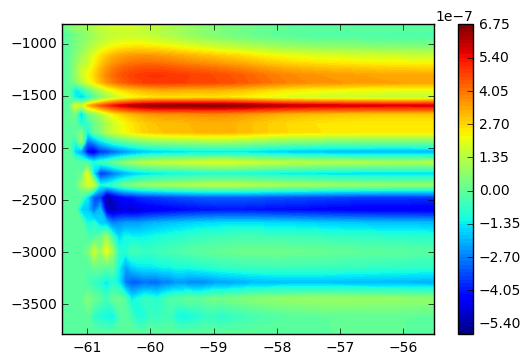

In [262]:
depth = z[:,0]
dz_sf = np.zeros((sum_wo_p.shape))
for k in range(0,sum_wo_p.shape[0]-1):
    dz = depth[k+1]-depth[k]
    dz_sf[k,:] = (sum_wo_p[k+1,:] - sum_wo_p[k,:]) / dz
plt.contourf(x,-z,dz_sf,100)
plt.colorbar()
plt.show()

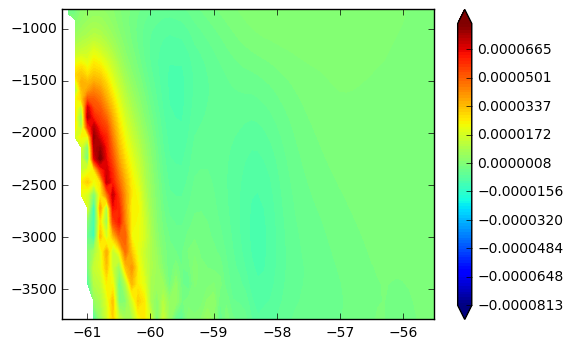

In [256]:
tmp_wo_p = mean_wo_p[ktop:kbot,llon:rlon]
high 	= np.max(abs(tmp_wo_p))
high = high
v = np.linspace(-high, high, 100, endpoint=True)
plt.contourf(x,-z,tmp_wo_p,v,extend="both")
#plt.contourf(x,-z,tmp_wo_p)
plt.colorbar()
plt.show()

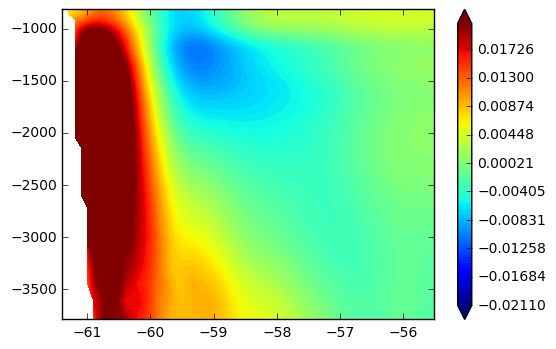

In [257]:
tmp_uko = mean_uko[ktop:kbot,llon:rlon]
high 	= np.max(abs(tmp_uko))
high = high - 0.6*high
v = np.linspace(-high, high, 100, endpoint=True)
plt.contourf(x,-z,tmp_uko,v,extend="both")
#plt.contourf(x,-z,tmp_wo_p)
plt.colorbar()
plt.show()

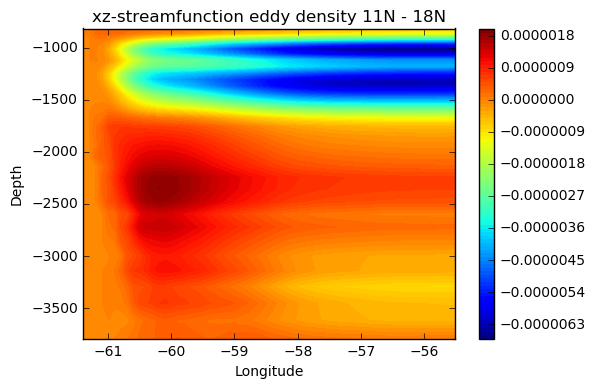

In [258]:
tmp_wrho = mean_wrho[ktop:kbot,llon:rlon]
tmp_wrho = ma.masked_invalid(tmp_wrho,copy=False)
sum_wrho = np.zeros((tmp_wrho.shape))
for i in range(tmp_wrho.shape[1]):
    sum_wrho[:,i] = sum_wrho[:,i-1] + tmp_wrho[:,i]
sum_wrho = ma.masked_invalid(sum_wrho,copy=False)

low = -0.03
high=0.03
v = np.linspace(low,high,100)
#plt.contourf(x,-z,sum_urho,v,extend="both")
plt.contourf(x,-z,sum_wrho,100)
plt.set_cmap("jet")
plt.colorbar()
plt.title("xz-streamfunction eddy density 11N - 18N")
plt.xlabel("Longitude")
plt.ylabel("Depth")
plt.savefig("xz-streamfunction_ed_11N-18N.png")
plt.show()

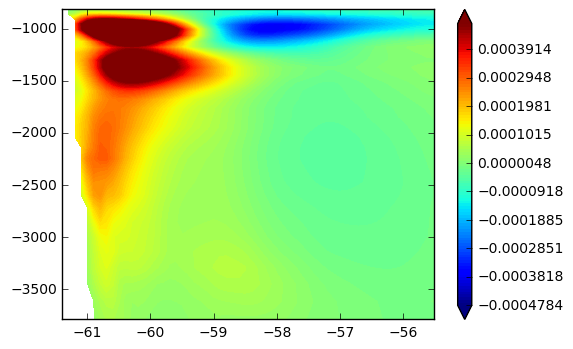

In [263]:
tmp_urho = mean_urho[ktop:kbot,llon:rlon]
high 	= np.max(abs(tmp_urho))
high = high - 0.6*high
v = np.linspace(-high, high, 100, endpoint=True)
plt.contourf(x,-z,tmp_urho,v,extend="both")
#plt.contourf(x,-z,tmp_wo_p)
plt.colorbar()
plt.show()